In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import acquire as aq
import prepare as pr
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy.stats as stats


## 1. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data. 

In [ ]:
df_iris = data('iris')

In [ ]:
# see the doc string for the data set
data('iris', show_doc = True)

- print the first 3 rows


In [ ]:
df_iris.head(3)

- print the number of rows and columns


In [ ]:
df_iris.shape

- print the column names

In [ ]:
df_iris.columns

# or create a list of column names 
df_iris.columns.tolist()

- print the data type of each column

In [ ]:
df_iris.dtypes

- print the summary statistics for each of the numeric variables

In [ ]:
stats = df_iris.describe().T
# .T transposes the summary stats table

In [ ]:
# add a range col and calculate range for each variable
stats['range'] = stats['max'] - stats['min']
stats

In [ ]:
# get only columns of interest from desc stats
stats[['mean', 'std', '50%', 'max', 'range']]

In [ ]:
# visualize the variable distributions 

df_iris['Sepal.Length'].hist(color = 'skyblue')
plt.title ('Distribution of Sepal Length')
plt.xlabel ('centimeters')

# Hide gridlines 
plt.grid(False)

plt.show()

- Would you recommend rescaling the data based on these statistics?

No because all numbers in desc stats are real numbers. There is not a huge range between the different variables and they are all in the same units of cm.

## 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
df_excel = pd.read_excel('Excel_Exercises_.xlsx', sheet_name='Table1_CustDetails')
df_excel.dtypes

- assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

- print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

- print the first 5 column names

In [ ]:
list(df_excel.columns[:5])

- print the column names that have a data type of object

In [ ]:
df_excel.select_dtypes(include='object').head()

In [ ]:
# to get just col names
df_excel.select_dtypes(include = 'object').columns.to_list()

- compute the range for each of the numeric variables.

In [ ]:
stats = df_excel.describe().T.head()
stats

In [ ]:
# add range col and compute range
stats['range'] = stats['max'] - stats['min']
stats

# 3. Read the data from this google sheet into a dataframe, df_google

In [ ]:
# Assign Google Sheet share url to a variable.
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [ ]:
# Use the replace method to modify Google Sheet share url to be a csv export url.
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
# Use read_csv() method to create our DataFrame.

df_google = pd.read_csv(csv_export_url)

- print the first 3 rows

In [ ]:
df_google.head(3)

- print the number of rows and columns

In [ ]:
df_google.shape

- print the column names

In [ ]:
df_google.columns.to_list()

- print the data type of each column

In [ ]:
df_google.dtypes

In [ ]:
# or to get a bit more info about null values
df_google.info()

- print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe()

- print the unique values for each of your categorical variables

In [ ]:
# create a for loop to only output number of values for columns with string dtypes
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values')

In [ ]:
# value counts with dropna False will show the count of nan values 
df_google['Sex'].value_counts(dropna =False)

In [ ]:
df_google['Embarked'].value_counts(dropna =False)

In [ ]:
# shows the count of all variables
df_google.nunique()

In [ ]:
titanic_df = acquire.get_titanic_data()

In [ ]:
titanic_df.head()

In [ ]:
iris_df = acquire.get_iris_data()
iris_df = iris_df[~ iris_df.sepal_length.isna()]

In [ ]:
iris_df.head()

In [ ]:
iris_df.shape

In [ ]:
iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])

In [ ]:
iris_df = iris_df.rename(columns={"species_name": "species"})

In [ ]:
iris_df.head()

In [ ]:
iris_df['species'].value_counts()

In [ ]:
dummy_df = pd.get_dummies(iris_df['species'], dummy_na = False, drop_first = True)

In [ ]:
dummy_df.head()

In [ ]:
dummy_df.info()

In [ ]:
iris_df.info()

In [ ]:
iris_df = pd.concat([iris_df, dummy_df], axis = 1)

In [ ]:
iris_df.info()

In [ ]:
iris_df.shape

In [ ]:
# added to prepare script
# def prep_iris_data(df):
#     '''
#     takes in a dataframe of the iris dataset as it is acquired and returns a cleaned dataframe
#     argument: df: a pandas df with expected feature names and columns
#     return: train, test, split: three dataframes with the cleanining operations performed on them
#     '''
#     iris_df = df.drop_duplicates()
#     iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])
#     iris_df = iris_df.rename(columns={"species_name": "species"})
#     train, test = train_test_split(iris_df, test_size= 0.2, random_state= 1349, stratify = iris_df.species)
#     train, validate = train_test_split(train, train_size= 0.7, random_state=1349, stratify = train.species)
#     return train, validate, test

In [ ]:
def prep_iris_data(df):
    '''
    takes in a dataframe of the iris dataset as it is acquired and returns a cleaned dataframe
    argument: df: a pandas df with expected feature names and columns
    return: train, test, split: three dataframes with the cleanining operations performed on them
    '''
    iris_df = df.drop_duplicates()
    iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])
    iris_df = iris_df.rename(columns={"species_name": "species"})
    train, test = train_test_split(iris_df, test_size= 0.2, random_state= 1349, stratify = iris_df.species)
    train, validate = train_test_split(train, train_size= 0.7, random_state=1349, stratify = train.species)
    return train, validate, test

In [ ]:
train, validate, test = prep_iris_data(iris_df)

In [ ]:
train.head(), test.head()

# Exploratory Analysis

#### Importing Prepared Data as train, validate and test datasets

In [3]:
iris_df = aq.get_iris_data()

In [4]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [5]:
train, validate, test = pr.prep_iris_data(iris_df)

In [6]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

## Univariate Stats

### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [8]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


#### Sepal Length Viz

In [9]:
train.sepal_length.describe()

count    84.000000
mean      5.847619
std       0.841324
min       4.300000
25%       5.075000
50%       5.900000
75%       6.425000
max       7.700000
Name: sepal_length, dtype: float64

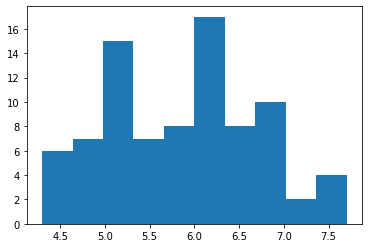

In [10]:
ax = train.sepal_length.hist()
ax.grid(False)

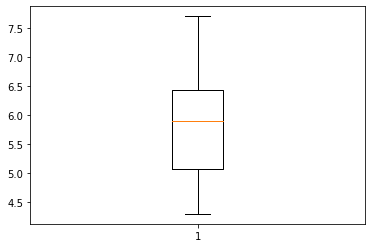

In [11]:
plt.boxplot(train['sepal_length'])
plt.show()

#### Sepal Width Viz

In [12]:
train.sepal_width.describe()

count    84.000000
mean      3.053571
std       0.417233
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64

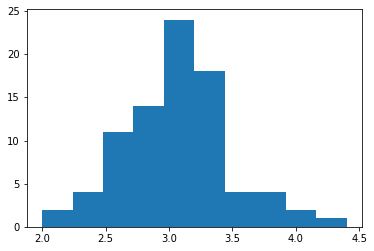

In [13]:
ax = train.sepal_width.hist()
ax.grid(False)

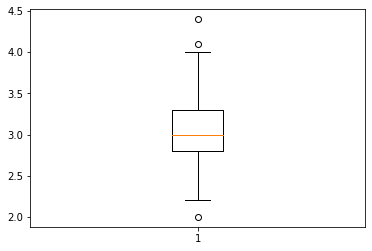

In [14]:
#sns.boxplot(data=train.sepal_width)
plt.boxplot(train['sepal_width'])
plt.show()

#### Petal Length viz

In [15]:
train.petal_length.describe()


count    84.000000
mean      3.738095
std       1.765459
min       1.000000
25%       1.600000
50%       4.300000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

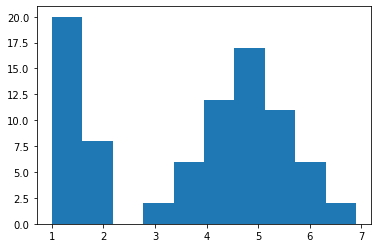

In [16]:
ax = train.petal_length.hist()
ax.grid(False)

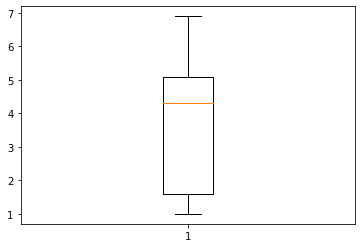

In [17]:
#sns.boxplot(data=train.petal_length)
plt.boxplot(train['petal_length'])
plt.show()

#### Petal Width Viz

In [18]:
train.petal_width.describe()

count    84.000000
mean      1.208333
std       0.775717
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

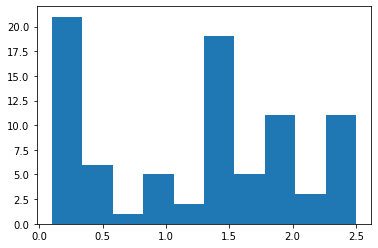

In [19]:
ax = train.petal_width.hist()
ax.grid(False)

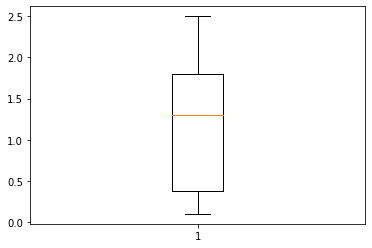

In [20]:
plt.boxplot(train['petal_width'])
plt.show()

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [29]:
# get the species
virginica_sp = train[train.species == 'virginica']
setosa_sp = train[train.species == 'setosa']
versicolor_sp = train[train.species == 'versicolor']

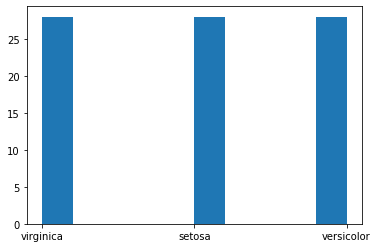

In [25]:
ax = train.species.hist()
ax.grid(False)

In [46]:
train.species.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

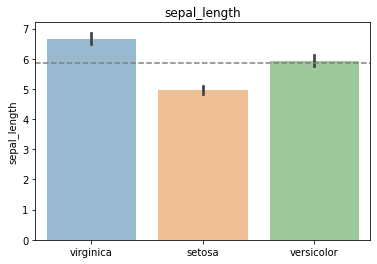

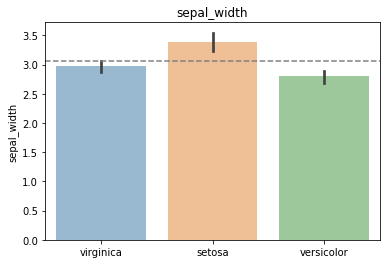

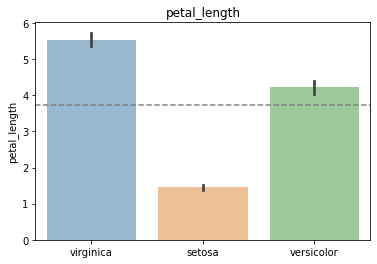

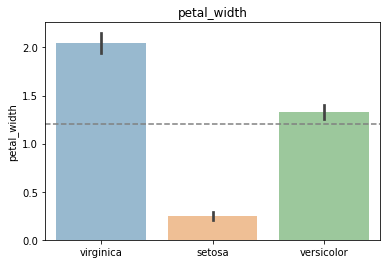

In [51]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
sepal_l = train.sepal_length.mean()
sepal_w = train.sepal_width.mean()
petal_l = train.petal_length.mean()
petal_w = train.petal_width.mean()
means = [sepal_l, sepal_w, petal_l, petal_w]

for i in range(0,4):
    sns.barplot('species',features[i], data=train, alpha =0.5)
    
    plt.xlabel('')
    plt.ylabel(features[i])
    plt.title(features[i])
    plt.axhline(means[i], ls = '--', color = 'grey')
    plt.show()

### Takeaways:
- Average Sepal Length is higher for Virginica
- 

## Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

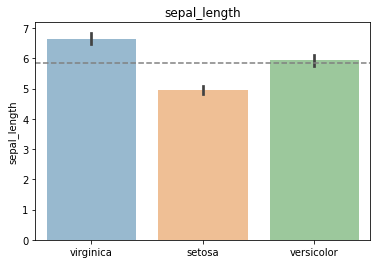

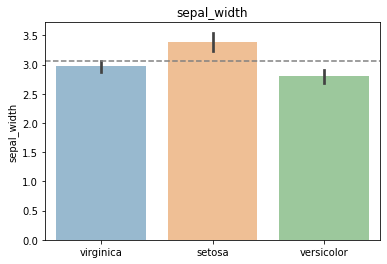

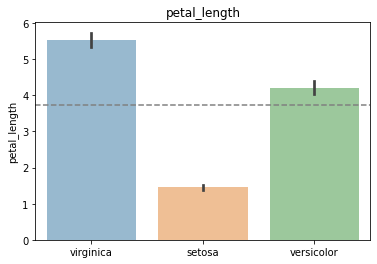

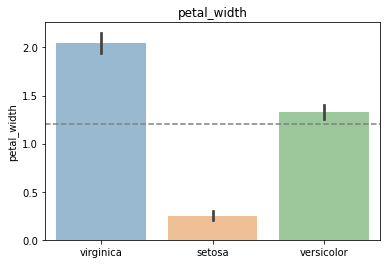

In [52]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
sepal_l = train.sepal_length.mean()
sepal_w = train.sepal_width.mean()
petal_l = train.petal_length.mean()
petal_w = train.petal_width.mean()
means = [sepal_l, sepal_w, petal_l, petal_w]

for i in range(0,4):
    sns.barplot('species',features[i], data=train, alpha =0.5)
    
    plt.xlabel('')
    plt.ylabel(features[i])
    plt.title(features[i])
    plt.axhline(means[i], ls = '--', color = 'grey')
    plt.show()

### For each measurement type, compute the descriptive statistics for each species.

In [53]:
# Descriptive stats for versicolor
train[(train['species'] == 'versicolor')].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


In [54]:
# Descriptive stats for virginica
train[(train['species'] == 'virginica')].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [55]:
# Descriptive stats for setosa
train[(train['species'] == 'setosa')].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


#### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

$H_{0}$: Mean petal width of Virginica = Mean petal width of Versicolor

$H_{a}$: Mean petal width of Virginica !=  Mean petal width of Versicolor

In [ ]:
stats.mannwhitneyu(train.petal_width, sl)

## Multivariate Stats

### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

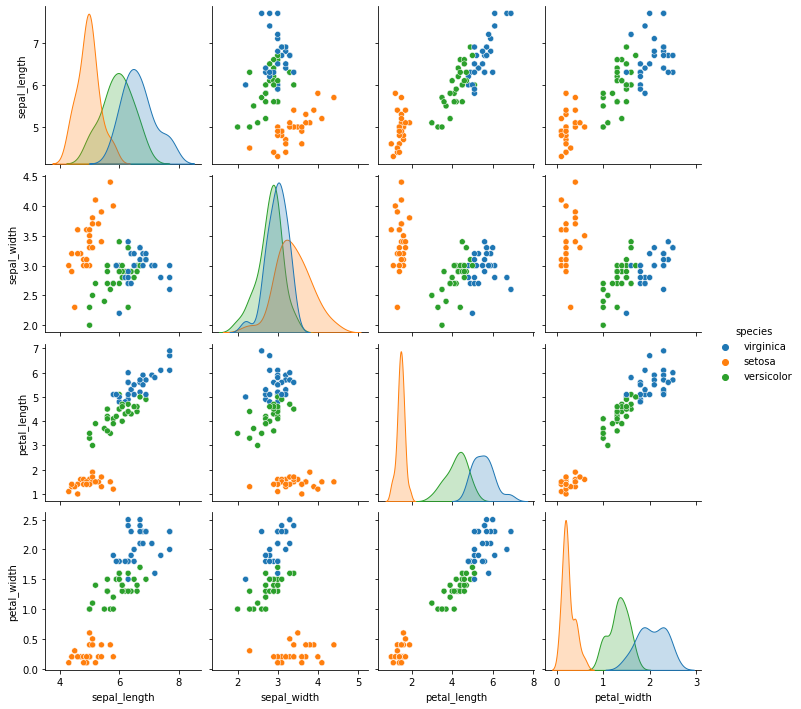

In [56]:
sns.pairplot(train, hue='species')
plt.show()

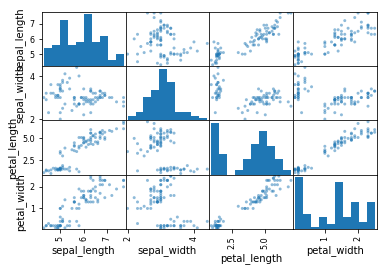

In [72]:
pd.plotting.scatter_matrix(train)
plt.show()

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [73]:
iris_melt = train.melt(id_vars=['species'])

In [74]:
iris_melt.head()

,species,variable,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2


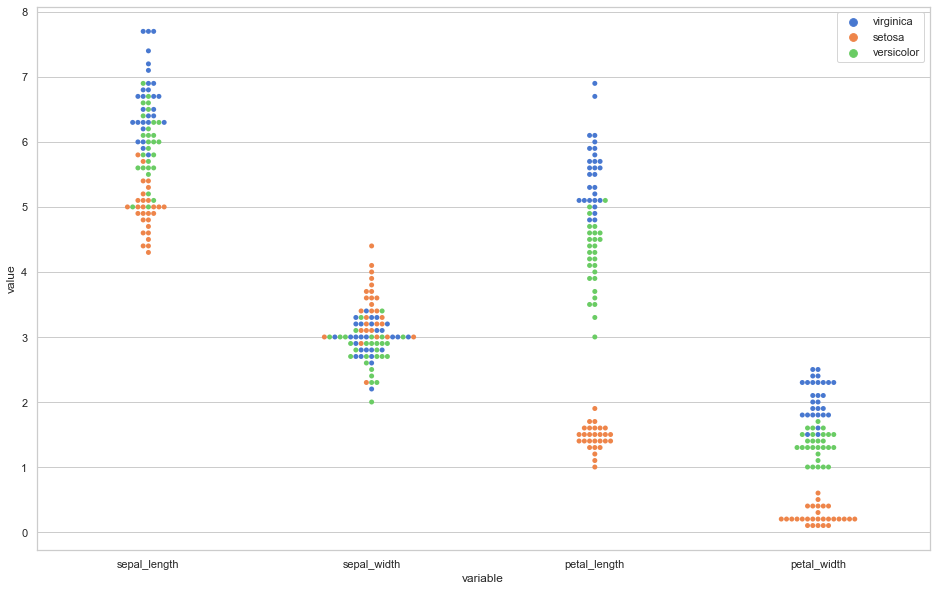

In [75]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(16,10))
p = sns.swarmplot(
    x="variable",
    y="value",
    hue="species",
    data=iris_melt,
)

plt.legend()
plt.show()

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

$H_{0}$: Mean sepal area of Virginica = Mean sepal area of Setosa

$H_{a}$: Mean sepal area of Virginica !=  Mean sepal area of Setosa

In [78]:
alpha = 0.05

In [79]:
train['sepal_area'] = train['sepal_width'] * train['sepal_length']

In [80]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
138,6.0,3.0,4.8,1.8,virginica,18.00
7,5.0,3.4,1.5,0.2,setosa,17.00
79,5.7,2.6,3.5,1.0,versicolor,14.82
74,6.4,2.9,4.3,1.3,versicolor,18.56
97,6.2,2.9,4.3,1.3,versicolor,17.98


In [81]:
# get the sepal area for each species
v_area = train.sepal_area[train.species == 'virginica']
s_area = train.sepal_area[train.species == 'setosa']

In [82]:
t, p = stats.ttest_ind(v_area, s_area, equal_var=True)
t,p

(3.850578685583481, 0.0003143775231868826)

In [83]:
if p < alpha: 
    print(f"Reject the null hypothesis.")
    print("There is a significant difference in sepal area between setosa and virginica.")
else:
    print("Fail to reject the null hypothesis.")
    print("Not enough evidence to support a significant difference in sepal area.")

Reject the null hypothesis.
There is a significant difference in sepal area between setosa and virginica.


### Takeaways and actions: